https://zhuanlan.zhihu.com/p/364510742

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 读取数据

## 特征解释
| 特征名称      | 意义            | 取值范围 |
| ------------- | --------------- | -------- |
| Date          | 日期            | 字符串   |
| Location      | 气象站的地址    | 字符串   |
| MinTemp       | 最低温度        | 实数     |
| MaxTemp       | 最高温度        | 实数     |
| Rainfall      | 降雨量          | 实数     |
| Evaporation   | 蒸发量          | 实数     |
| Sunshine      | 光照时间        | 实数     |
| WindGustDir   | 最强的风的方向  | 字符串   |
| WindGustSpeed | 最强的风的速度  | 实数     |
| WindDir9am    | 早上9点的风向   | 字符串   |
| WindDir3pm    | 下午3点的风向   | 字符串   |
| WindSpeed9am  | 早上9点的风速   | 实数     |
| WindSpeed3pm  | 下午3点的风速   | 实数     |
| Humidity9am   | 早上9点的湿度   | 实数     |
| Humidity3pm   | 下午3点的湿度   | 实数     |
| Pressure9am   | 早上9点的大气压 | 实数     |
| Pressure3pm   | 早上3点的大气压 | 实数     |
| Cloud9am      | 早上9点的云指数 | 实数     |
| Cloud3pm      | 早上3点的云指数 | 实数     |
| Temp9am       | 早上9点的温度   | 实数     |
| Temp3pm       | 早上3点的温度   | 实数     |
| RainToday     | 今天是否下雨    | No，Yes  |
| RainTomorrow  | 明天是否下雨    | No，Yes  |

In [2]:
weather = pd.read_csv("../data/weather.zip")
weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2012/1/19,MountGinini,12.1,23.1,0.0,NaN,NaN,W,30.0,N,...,60.0,54.0,NaN,NaN,NaN,NaN,17.0,22.0,No,No
1,2015/4/13,Nhil,10.2,24.7,0.0,NaN,NaN,E,39.0,E,...,63.0,33.0,1021.9,1017.9,NaN,NaN,12.5,23.7,No,Yes
2,2010/8/5,Nuriootpa,-0.4,11.0,3.6,0.4,1.6,W,28.0,N,...,97.0,78.0,1025.9,1025.3,7.0,8.0,3.9,9.0,Yes,No
3,2013/3/18,Adelaide,13.2,22.6,0.0,15.4,11.0,SE,44.0,E,...,47.0,34.0,1025.0,1022.2,NaN,NaN,15.2,21.7,No,No
4,2011/2/16,Sale,14.1,28.6,0.0,6.6,6.7,E,28.0,NE,...,92.0,42.0,1018.0,1014.1,4.0,7.0,19.1,28.2,No,No


In [193]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106644 entries, 0 to 106643
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           106644 non-null  object 
 1   Location       106644 non-null  object 
 2   MinTemp        106183 non-null  float64
 3   MaxTemp        106413 non-null  float64
 4   Rainfall       105610 non-null  float64
 5   Evaporation    60974 non-null   float64
 6   Sunshine       55718 non-null   float64
 7   WindGustDir    99660 non-null   object 
 8   WindGustSpeed  99702 non-null   float64
 9   WindDir9am     99166 non-null   object 
 10  WindDir3pm     103788 non-null  object 
 11  WindSpeed9am   105643 non-null  float64
 12  WindSpeed3pm   104653 non-null  float64
 13  Humidity9am    105327 non-null  float64
 14  Humidity3pm    103932 non-null  float64
 15  Pressure9am    96107 non-null   float64
 16  Pressure3pm    96123 non-null   float64
 17  Cloud9am       66303 non-null

In [194]:
weather.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [195]:
weather.shape

(106644, 23)

# 数据预处理

In [196]:
numerical_features = [x for x in weather.columns if weather[x].dtype == np.float64]

category_features = [x for x in weather.columns if weather[x].dtype != np.float64]

## dropna

In [197]:
np.any(weather.isna())

True

In [198]:
weather.dropna(inplace=True)

In [199]:
weather.shape

(42307, 23)

In [200]:
np.any(weather.isna())

False

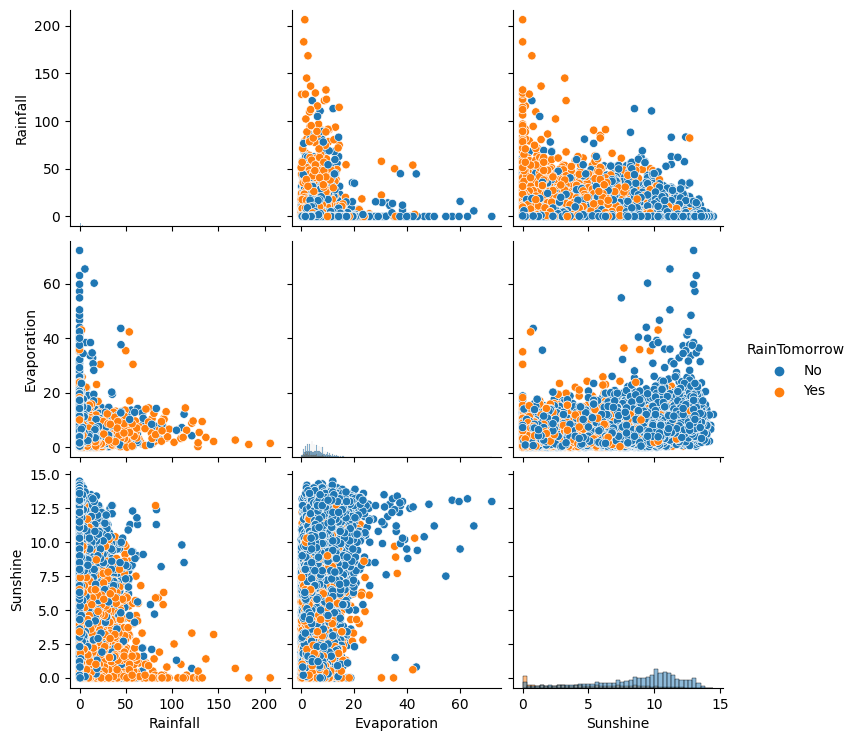

In [201]:
## 选取三个特征与标签组合的散点可视化
sns.pairplot(
    data=weather[["Rainfall", "Evaporation", "Sunshine", "RainTomorrow"]],
    diag_kind="hist",
    hue="RainTomorrow",
)

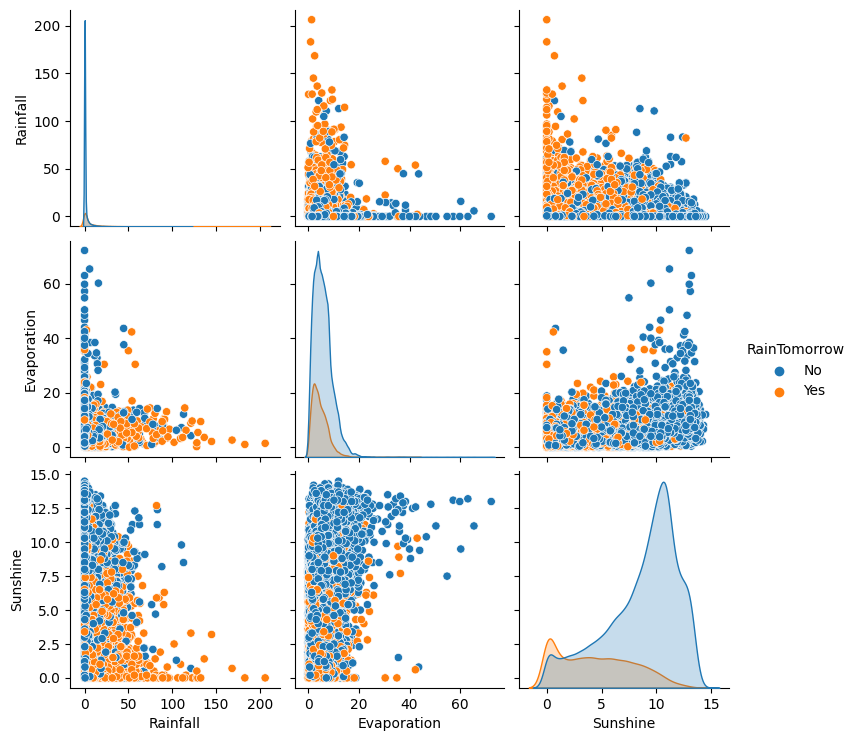

In [202]:
## 选取三个特征与标签组合的散点可视化
sns.pairplot(
    data=weather[["Rainfall", "Evaporation", "Sunshine", "RainTomorrow"]],
    diag_kind="kde",
    hue="RainTomorrow",
)

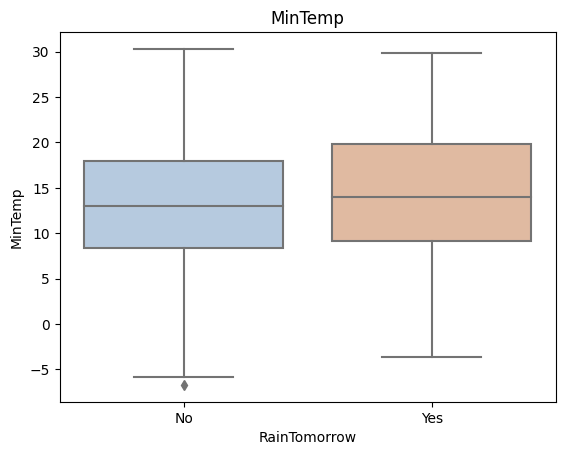

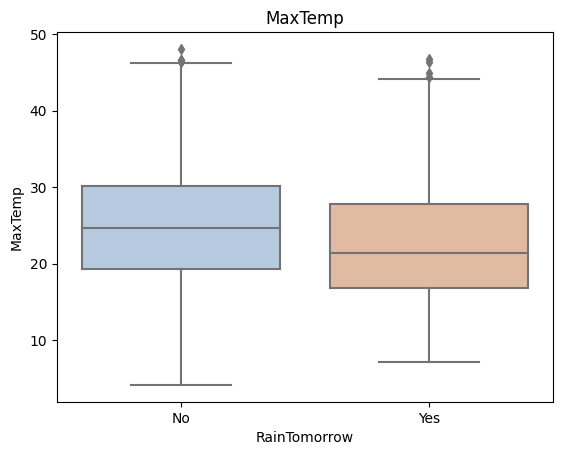

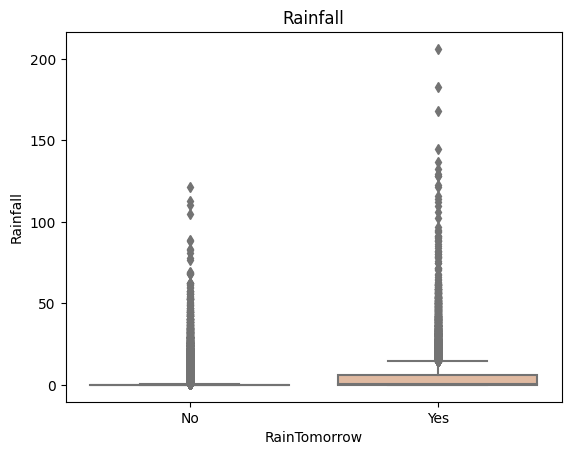

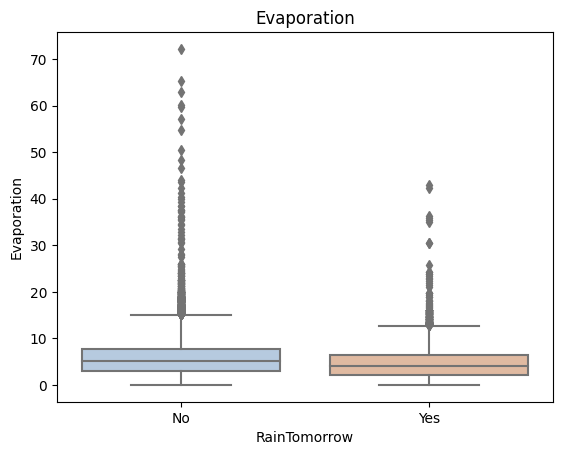

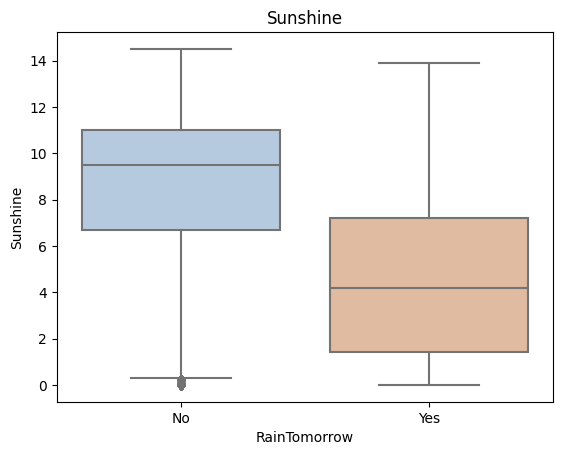

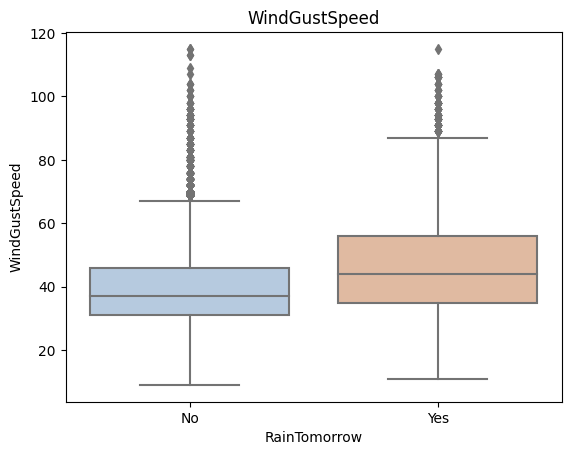

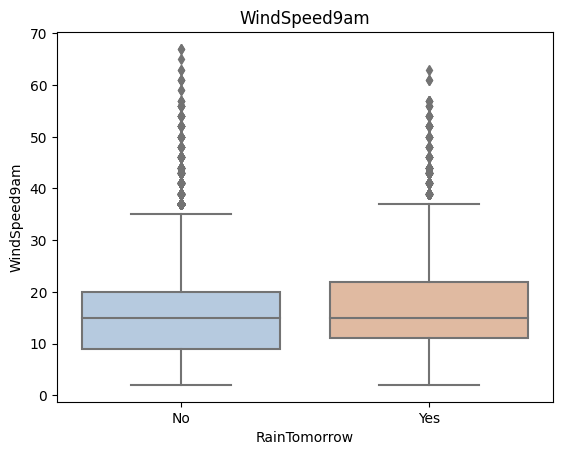

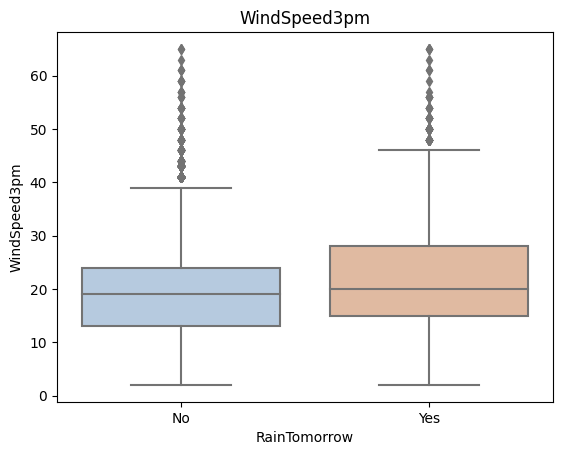

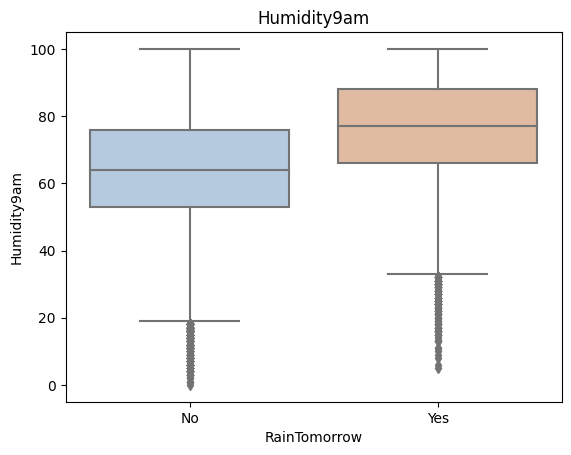

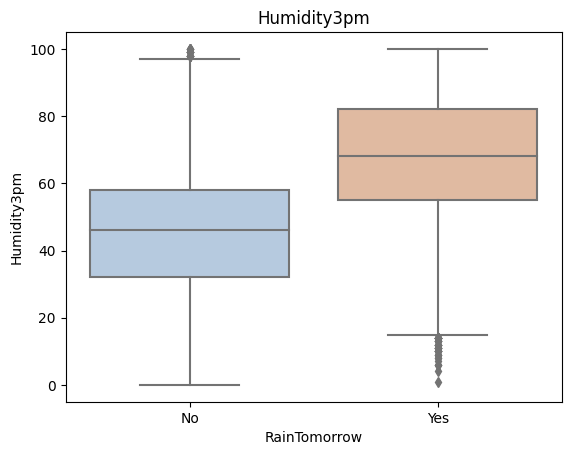

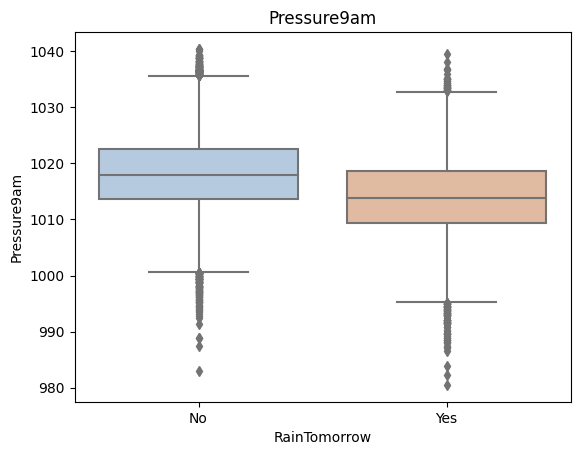

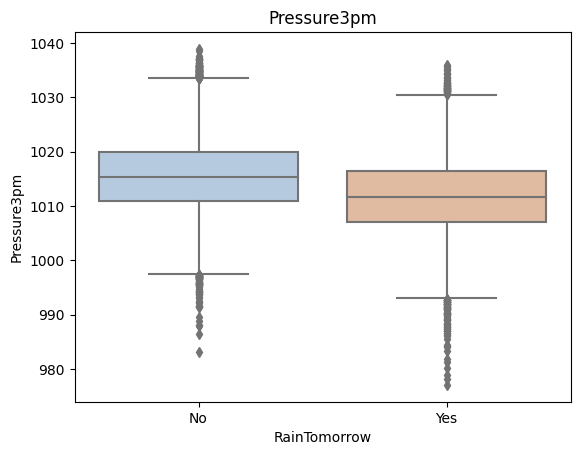

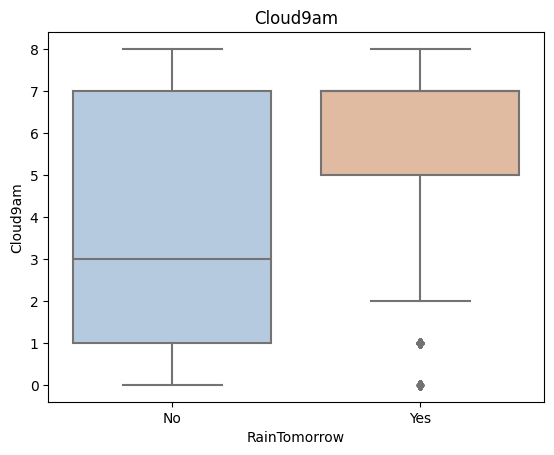

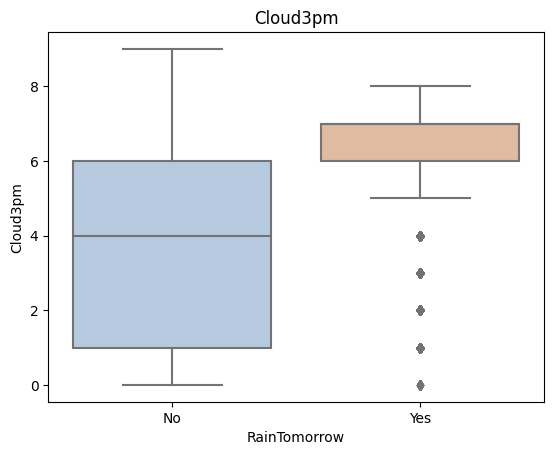

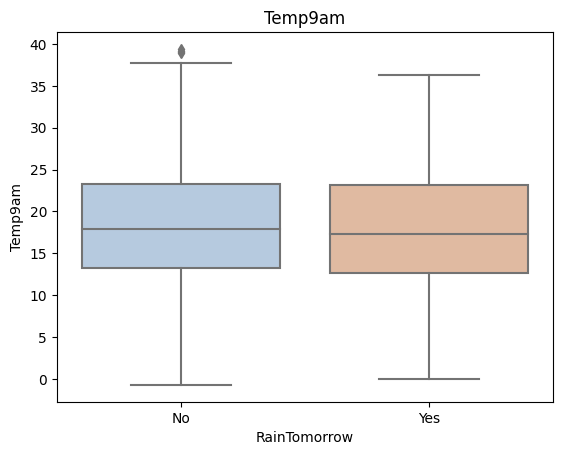

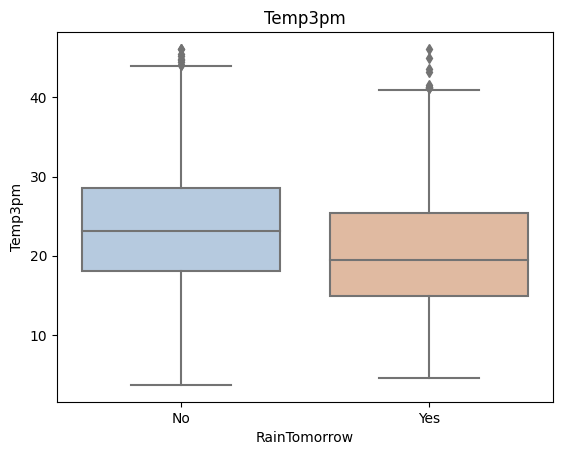

In [203]:
for col in weather[numerical_features].columns:
    if col != "RainTomorrow":
        sns.boxplot(
            x="RainTomorrow", y=col, saturation=0.5, palette="pastel", data=weather
        )
        plt.title(col)
        plt.show()

In [204]:
weather[category_features]

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
2,2010/8/5,Nuriootpa,W,N,W,Yes,No
4,2011/2/16,Sale,E,NE,E,No,No
7,2011/8/7,Moree,NNE,N,WNW,No,No
9,2014/10/15,NorfolkIsland,ENE,NE,NE,No,No
10,2015/10/27,Nuriootpa,SE,ENE,NE,No,No
...,...,...,...,...,...,...,...
106621,2010/6/30,Hobart,NW,NW,ENE,No,No
106624,2013/5/20,SydneyAirport,W,W,WSW,No,No
106634,2014/6/11,AliceSprings,ENE,WSW,E,No,No
106635,2009/5/27,Mildura,SSW,SSW,SW,No,No


# 转换object

In [205]:
weather[category_features]

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
2,2010/8/5,Nuriootpa,W,N,W,Yes,No
4,2011/2/16,Sale,E,NE,E,No,No
7,2011/8/7,Moree,NNE,N,WNW,No,No
9,2014/10/15,NorfolkIsland,ENE,NE,NE,No,No
10,2015/10/27,Nuriootpa,SE,ENE,NE,No,No
...,...,...,...,...,...,...,...
106621,2010/6/30,Hobart,NW,NW,ENE,No,No
106624,2013/5/20,SydneyAirport,W,W,WSW,No,No
106634,2014/6/11,AliceSprings,ENE,WSW,E,No,No
106635,2009/5/27,Mildura,SSW,SSW,SW,No,No


In [206]:
## 把所有的相同类别的特征编码为同一个值
def get_mapfunction(x):
    mapp = dict(zip(x.unique().tolist(), range(len(x.unique().tolist()))))

    def mapfunction(y):
        if y in mapp:
            return mapp[y]
        else:
            return -1

    return mapfunction


for i in category_features:
    weather[i] = weather[i].apply(get_mapfunction(weather[i]))

In [207]:
weather[category_features]

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
2,0,0,0,0,0,0,0
4,1,1,1,1,1,1,0
7,2,2,2,0,2,1,0
9,3,3,3,1,3,1,0
10,4,0,4,2,3,1,0
...,...,...,...,...,...,...,...
106621,741,10,6,7,9,1,0
106624,121,12,0,9,4,1,0
106634,2505,24,3,12,1,1,0
106635,716,9,11,10,10,1,0


In [208]:
np.unique(weather["Date"].values).shape

(3366,)

In [209]:
weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
2,0,0,-0.4,11.0,3.6,0.4,1.6,0,28.0,0,...,97.0,78.0,1025.9,1025.3,7.0,8.0,3.9,9.0,0,0
4,1,1,14.1,28.6,0.0,6.6,6.7,1,28.0,1,...,92.0,42.0,1018.0,1014.1,4.0,7.0,19.1,28.2,1,0
7,2,2,10.8,19.4,0.0,3.8,1.2,2,33.0,0,...,67.0,53.0,1019.7,1015.2,7.0,7.0,16.1,19.2,1,0
9,3,3,14.0,21.1,0.0,6.6,6.2,3,37.0,1,...,58.0,80.0,1022.8,1021.1,1.0,7.0,19.3,18.5,1,0
10,4,0,6.7,24.5,0.0,6.5,12.5,4,46.0,2,...,55.0,38.0,1024.2,1020.1,0.0,3.0,12.5,22.9,1,0


In [210]:
weather.dtypes

Date               int64
Location           int64
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir        int64
WindGustSpeed    float64
WindDir9am         int64
WindDir3pm         int64
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday          int64
RainTomorrow       int64
dtype: object

# 划分数据

In [211]:
x = weather.iloc[:, :-1]
x.shape

(42307, 22)

In [212]:
y = weather["RainTomorrow"]
y.shape

(42307,)

In [213]:
from sklearn.model_selection import train_test_split

In [214]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=0)
(
    x_train.shape,
    x_test.shape,
    y_train.shape,
    y_test.shape,
)

((21153, 22), (21154, 22), (21153,), (21154,))

In [215]:
y_train.values[y_train.values == 0].shape

(16623,)

In [216]:
y_train.values[y_train.values == 1].shape

(4530,)

In [217]:
y_test.values[y_test.values == 0].shape

(16410,)

In [218]:
y_test.values[y_test.values == 1].shape

(4744,)

# SVC

In [219]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, log_loss

In [220]:
svc = SVC(probability=True)
svc

SVC(probability=True)

In [221]:
svc.fit(x_train, y_train)

SVC(probability=True)

In [222]:
svc.score(x_test, y_test)

0.7757398128013614

In [223]:
y_pred1 = svc.predict(x_test)
y_pred1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [224]:
accuracy_score(y_test, y_pred1)

0.7757398128013614

In [225]:
y_pred_proba1 = svc.predict_proba(x_test)
y_pred_proba1[:10]

array([[0.921622  , 0.078378  ],
       [0.89621462, 0.10378538],
       [0.97566686, 0.02433314],
       [0.93214444, 0.06785556],
       [0.74280229, 0.25719771],
       [0.97208476, 0.02791524],
       [0.90245267, 0.09754733],
       [0.97696249, 0.02303751],
       [0.9194266 , 0.0805734 ],
       [0.9768592 , 0.0231408 ]])

In [226]:
log_loss(y_test, y_pred_proba1)

0.3719204127748114

# RandomForestClassifier

In [227]:
from sklearn.ensemble import RandomForestClassifier

In [228]:
rfc = RandomForestClassifier(
    n_estimators=100, max_depth=20, criterion="entropy", n_jobs=-1
)
rfc

RandomForestClassifier(criterion='entropy', max_depth=20, n_jobs=-1)

In [229]:
rfc.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, n_jobs=-1)

In [230]:
rfc.score(x_test, y_test)

0.853266521698024

In [231]:
y_pred2 = rfc.predict(x_test)
y_pred2

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [232]:
accuracy_score(y_test, y_pred2)

0.853266521698024

In [233]:
y_pred_proba2 = rfc.predict_proba(x_test)
y_pred_proba2[:10]

array([[0.96662952, 0.03337048],
       [0.88023495, 0.11976505],
       [0.92682301, 0.07317699],
       [0.82859978, 0.17140022],
       [0.67727273, 0.32272727],
       [0.85408394, 0.14591606],
       [0.96706781, 0.03293219],
       [0.97      , 0.03      ],
       [0.9256055 , 0.0743945 ],
       [1.        , 0.        ]])

In [234]:
log_loss(y_test, y_pred_proba2)

0.33942835264624144

## RandomizedSearchCV

In [235]:
from sklearn.model_selection import RandomizedSearchCV

In [236]:
param_distributions = {
    "n_estimators": np.arange(10, 301, 10),
    "max_depth": np.arange(5, 51, 1),
}

In [237]:
rscv2 = RandomizedSearchCV(
    estimator=RandomForestClassifier(criterion="entropy"),
    param_distributions=param_distributions,
    n_iter=50,
    n_jobs=-1,
)

In [238]:
rscv2.fit(x_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(criterion='entropy'),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260,
       270, 280, 290, 300])})

In [246]:
rscv2.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=30, n_estimators=220)

In [247]:
rscv2.best_estimator_.score(x_test, y_test)

0.8536447007658126

In [248]:
rscv2.best_estimator_.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [249]:
y_pred2_1 = rscv2.best_estimator_.predict(x_test)
y_pred2_1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [250]:
accuracy_score(y_test, y_pred2_1)

0.8536447007658126

In [251]:
y_pred_proba2_1 = rscv2.best_estimator_.predict_proba(x_test)
y_pred_proba2_1[:10]

array([[0.98181818, 0.01818182],
       [0.89090909, 0.10909091],
       [0.91818182, 0.08181818],
       [0.87272727, 0.12727273],
       [0.72272727, 0.27727273],
       [0.79090909, 0.20909091],
       [0.97272727, 0.02727273],
       [0.97272727, 0.02727273],
       [0.96363636, 0.03636364],
       [0.99545455, 0.00454545]])

In [252]:
log_loss(y_test, y_pred_proba2_1)

0.333682584270114

# XGBClassifier

In [305]:
from xgboost import XGBClassifier

In [306]:
xgbc = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    max_leaves=10,
    subsample=1,  # 系统默认为1。这个参数控制对于每棵树，随机采样的比例。减小这个参数的值，算法会更加保守，避免过拟合, 取值范围零到一
    colsample_bytree=1,  # 系统默认值为1。我们一般设置成0.8左右。用来控制每棵随机采样的列数的占比(每一列是一个特征)
    # gpu_id=0,
    n_jobs=-1,
)
xgbc

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=10,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [307]:
xgbc.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=10,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [308]:
xgbc.score(x_test, y_test)

0.8562919542403328

In [309]:
y_pred3 = xgbc.predict(x_test)
y_pred3

array([0, 0, 0, ..., 0, 0, 0])

In [310]:
accuracy_score(y_test, y_pred3)

0.8562919542403328

In [311]:
y_pred_proba3 = xgbc.predict_proba(x_test)
y_pred_proba3[:10]

array([[0.9697208 , 0.03027919],
       [0.848101  , 0.15189901],
       [0.91699284, 0.08300716],
       [0.8488354 , 0.15116458],
       [0.7680384 , 0.23196162],
       [0.8683346 , 0.13166541],
       [0.97484404, 0.02515599],
       [0.96709114, 0.03290885],
       [0.9508662 , 0.04913376],
       [0.99158895, 0.00841103]], dtype=float32)

In [312]:
log_loss(y_test, y_pred_proba3)

0.3286976491878027

## RandomizedSearchCV

In [261]:
param_distributions = {
    "learning_rate": [0.1, 0.3, 0.6],
    "max_depth": np.arange(3, 10, 1),
    "max_leaves": np.arange(5, 20, 5),
    "subsample": [0.7, 0.8, 0.9],
    "colsample_bytree": [0.4, 0.6, 0.8],
}

In [262]:
rscv3 = RandomizedSearchCV(
    estimator=XGBClassifier(n_estimators=100),
    param_distributions=param_distributions,
    n_iter=100,
    n_jobs=-1,
)

In [263]:
rscv3.fit(x_train, y_train)

RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None...
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.4, 0.6, 0.8],
                                        'learning_rate': [0.1, 0.3, 0.6],
                                        'max_depth': array([3, 4, 5, 6, 7, 8, 9]),
                                        'max_leaves': array([ 5, 10, 15]),
                                        'subsample': [0.7, 0.8, 0.9]})

In [264]:
rscv3.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=5,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [265]:
rscv3.best_estimator_.score(x_test, y_test)

0.855819230405597

In [266]:
y_pred3_1 = rscv3.best_estimator_.predict(x_test)
y_pred3_1

array([0, 0, 0, ..., 0, 0, 0])

In [267]:
accuracy_score(y_test, y_pred3_1)

0.855819230405597

In [270]:
y_pred_proba3_1 = rscv3.best_estimator_.predict_proba(x_test)
y_pred_proba3_1[:10]

array([[0.9835437 , 0.01645633],
       [0.94746375, 0.05253622],
       [0.94210005, 0.05789993],
       [0.86331624, 0.13668378],
       [0.6700736 , 0.3299264 ],
       [0.87865585, 0.12134414],
       [0.9851369 , 0.01486306],
       [0.9893255 , 0.0106745 ],
       [0.8866739 , 0.11332607],
       [0.98837054, 0.01162945]], dtype=float32)

In [271]:
log_loss(y_test, y_pred_proba3_1)

0.32762261251203834

# LGBMClassifier

In [272]:
from lightgbm import LGBMClassifier

In [273]:
lgbmc = LGBMClassifier(
    boosting_type="gbdt",
    num_leaves=31,
    max_depth=-1,
    learning_rate=0.1,
    n_estimators=100,
    n_jobs=-1,
)
lgbmc

LGBMClassifier()

In [274]:
lgbmc.fit(x_train, y_train)

LGBMClassifier()

In [275]:
lgbmc.score(x_test, y_test)

0.8576155809775929

In [276]:
y_pred4 = lgbmc.predict(x_test)

In [277]:
accuracy_score(y_test, y_pred4)

0.8576155809775929

In [278]:
y_pred_proba4 = lgbmc.predict_proba(x_test)
y_pred_proba4[:10]

array([[0.9681831 , 0.0318169 ],
       [0.8973749 , 0.1026251 ],
       [0.93919512, 0.06080488],
       [0.80483261, 0.19516739],
       [0.8015592 , 0.1984408 ],
       [0.8375828 , 0.1624172 ],
       [0.97543019, 0.02456981],
       [0.97743409, 0.02256591],
       [0.91834927, 0.08165073],
       [0.98795262, 0.01204738]])

In [279]:
log_loss(y_test, y_pred_proba4)

0.32658583458304674

# CatBoostClassifier

In [120]:
from catboost import CatBoostClassifier

In [121]:
cbc = CatBoostClassifier(
    learning_rate=0.1,
)
cbc

In [122]:
cbc.fit(x_train, y_train)

0:	learn: 0.6135504	total: 149ms	remaining: 2m 29s
1:	learn: 0.5542261	total: 158ms	remaining: 1m 19s
2:	learn: 0.5062492	total: 168ms	remaining: 55.7s
3:	learn: 0.4776743	total: 177ms	remaining: 44s
4:	learn: 0.4493673	total: 186ms	remaining: 37.1s
5:	learn: 0.4272090	total: 196ms	remaining: 32.4s
6:	learn: 0.4115208	total: 205ms	remaining: 29.1s
7:	learn: 0.3986677	total: 213ms	remaining: 26.5s
8:	learn: 0.3852906	total: 223ms	remaining: 24.6s
9:	learn: 0.3738428	total: 233ms	remaining: 23s
10:	learn: 0.3659562	total: 241ms	remaining: 21.7s
11:	learn: 0.3603360	total: 250ms	remaining: 20.6s
12:	learn: 0.3555801	total: 259ms	remaining: 19.7s
13:	learn: 0.3521059	total: 269ms	remaining: 18.9s
14:	learn: 0.3489051	total: 278ms	remaining: 18.2s
15:	learn: 0.3455945	total: 287ms	remaining: 17.6s
16:	learn: 0.3435097	total: 296ms	remaining: 17.1s
17:	learn: 0.3413767	total: 305ms	remaining: 16.7s
18:	learn: 0.3383408	total: 315ms	remaining: 16.3s
19:	learn: 0.3362355	total: 324ms	remaining

In [123]:
cbc.score(x_test, y_test)

0.8588446629479058

In [124]:
y_pred5 = cbc.predict(x_test)

In [125]:
accuracy_score(y_test, y_pred5)

0.8588446629479058

In [126]:
y_pred_proba5 = lgbmc.predict_proba(x_test)
y_pred_proba5[:10]

array([[0.9681831 , 0.0318169 ],
       [0.8973749 , 0.1026251 ],
       [0.93919512, 0.06080488],
       [0.80483261, 0.19516739],
       [0.8015592 , 0.1984408 ],
       [0.8375828 , 0.1624172 ],
       [0.97543019, 0.02456981],
       [0.97743409, 0.02256591],
       [0.91834927, 0.08165073],
       [0.98795262, 0.01204738]])

In [127]:
log_loss(y_test, y_pred_proba5)

0.32658583458304674